# Heart Disease Prediction

## Import Libraries

In [3]:
!pip install plotly -q

In [4]:
!pip install scikit-learn -q


In [5]:
!pip install xgboost -q

In [6]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Load the Heart Disease Dataset

In [7]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [10]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore each column

In [11]:
df['id'].min(), df['id'].max()

(1, 920)

In [12]:
df['age'].min(), df['age'].max()

(28, 77)

In [13]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [14]:
df['age'].groupby(df['sex']).value_counts(ascending=True)

sex     age
Female  30      1
        31      1
        32      1
        33      1
        40      1
               ..
Male    59     32
        56     33
        55     34
        54     36
        58     36
Name: count, Length: 91, dtype: int64

#### Drawing the histogram of male and female patients

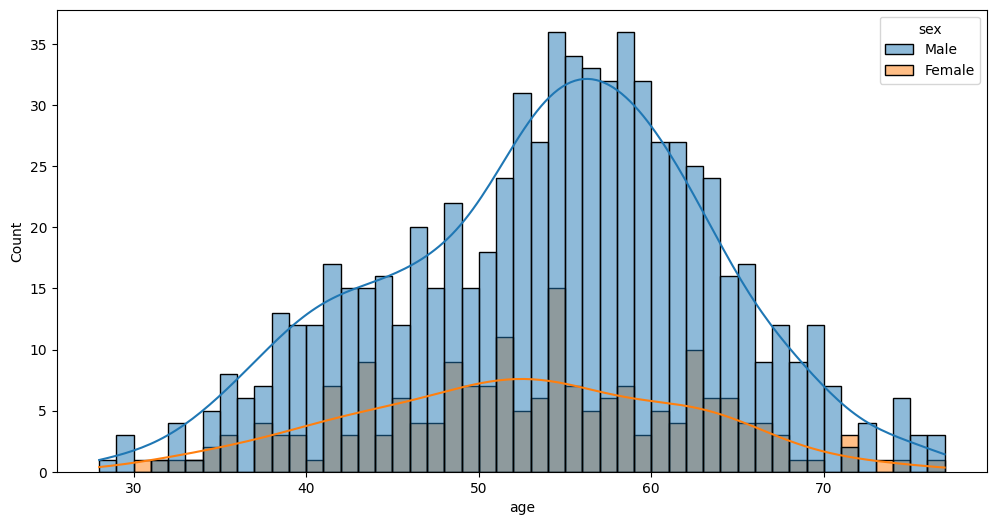

In [15]:
# check the distribution of age using graphs
plt.figure(figsize=(12, 6))
plot = sns.histplot(df, x= df['age'], kde=True, bins=77-28, hue=df['sex'])

# for patch in plot.patches:
#     x = round(patch.get_x() + patch.get_width() / 2, 0)
#     y = patch.get_height()

#     plot.annotate(f'{y}', (x, y), ha='center', va='bottom')



In [16]:
df['age'].mean(), df['age'].median(), df['age'].mode()[0]

(53.51086956521739, 54.0, 54)

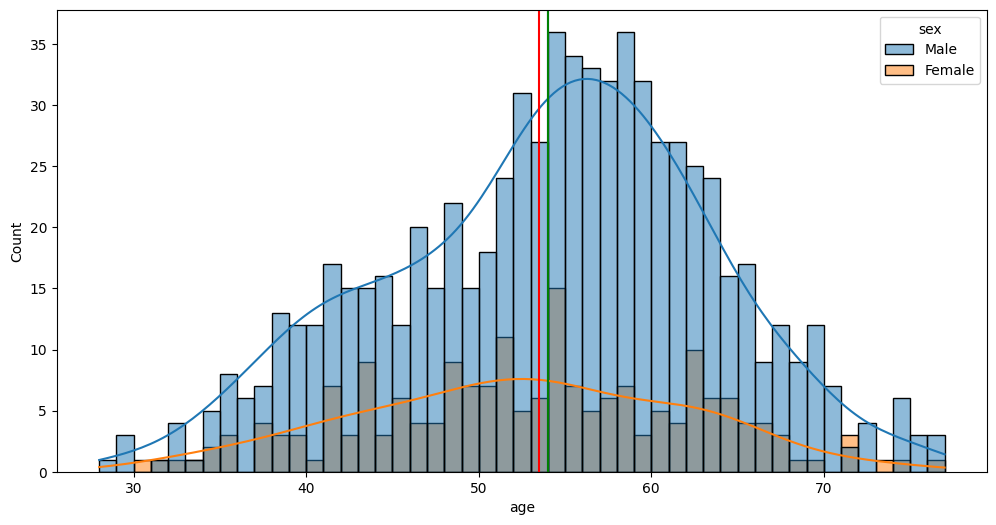

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x= df['age'], kde=True, bins=77-28, hue=df['sex'])
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='blue')
plt.axvline(df['age'].mode()[0], color='green')

In [18]:
# plot the histogram of age column using plotly and groupby sex
fig = px.histogram(df, x='age', color='sex', nbins=77-23)
fig.show()

In [19]:
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [20]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [21]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [22]:
((df['sex'] == 'Male').sum() - (df['sex'] == 'Female').sum()) / len(df['sex']) * 100

57.826086956521735

In [23]:
# number of males and females in the dataset
num_males = (df['sex'] == 'Male').value_counts()[0]
num_females = (df['sex'] == 'Female').value_counts()[1]

print(num_males)
print(num_females)

726
194


In [24]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [25]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [26]:
df['dataset'].groupby(df['sex']).value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

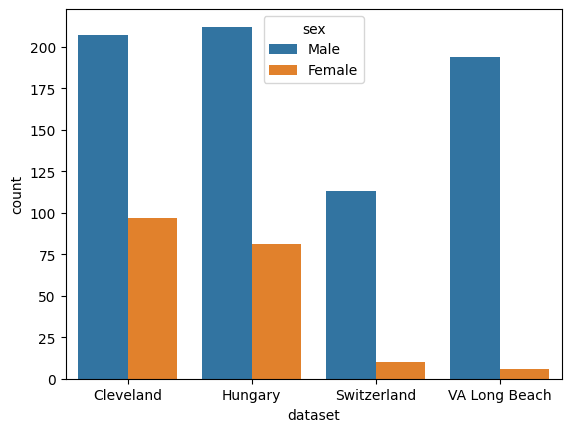

In [27]:
sns.countplot(data=df, x='dataset', hue='sex')

<Axes: xlabel='dataset', ylabel='count'>

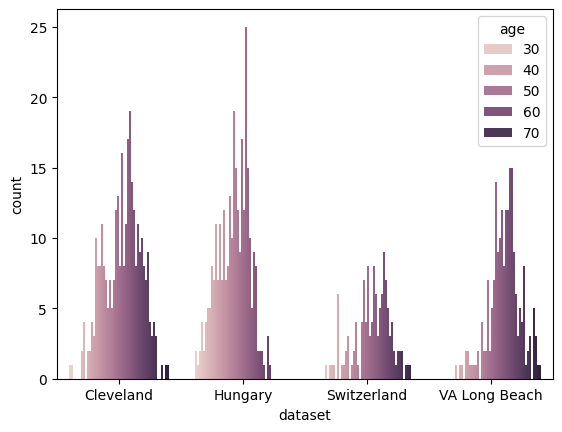

In [28]:
sns.countplot(data=df, x='dataset', hue='age')

In [29]:
px.bar(df, x='dataset', color='sex')

In [30]:
print(df.groupby('dataset')['age'].mean())
print(df.groupby('dataset')['age'].std())

print(df.groupby('dataset')['age'].median())
print(df.groupby('dataset')['age'].agg(pd.Series.mode))

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
dataset
Cleveland        9.150256
Hungary          7.738385
Switzerland      9.032108
VA Long Beach    7.811697
Name: age, dtype: float64
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [31]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [32]:
df.groupby('cp')['age'].value_counts()

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
typical angina  60      1
                63      1
                66      1
                68      1
                74      1
Name: count, Length: 156, dtype: int64

In [33]:
fig = px.histogram(df, x='age', color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

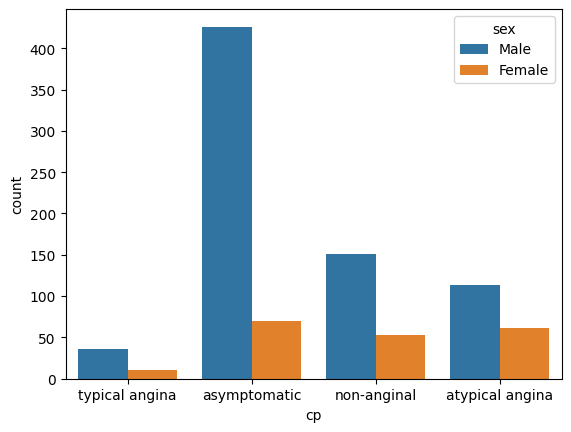

In [34]:
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='trestbps', ylabel='Count'>

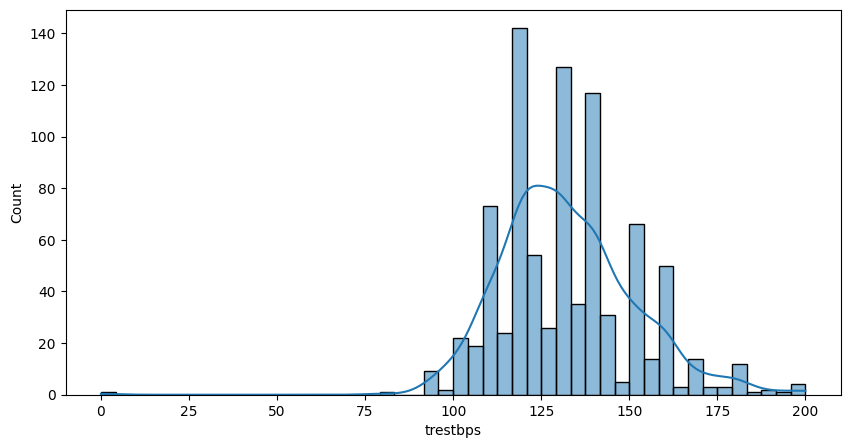

In [35]:
plt.figure(figsize=(10
                    ,5))
sns.histplot(df, x='trestbps', kde= True)

In [36]:
df['trestbps'].value_counts().sum()

861

In [37]:
px.histogram(df, x='trestbps')

In [38]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [39]:
df['trestbps'].describe().to_frame()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [40]:
# print 1st row and 1st column value of a dataframe

df['trestbps'].describe().to_frame().iloc[1,0]

132.13240418118468

### Using iterative imputer for missing values

In [41]:
# i_imputer = IterativeImputer()
# df['trestbps'] = i_imputer.fit_transform(df['trestbps'].values.reshape(-1,1))

In [42]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [44]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [45]:
ca, oldpeak, thalch, chol = df['ca'], df['oldpeak'], df['thalch'], df['chol']

In [46]:
# i_imputer_2 = IterativeImputer()

# df[['ca', 'oldpeak', 'thalch', 'chol']] = i_imputer_2.fit_transform(df[['ca', 'oldpeak', 'thalch', 'chol']])

In [47]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [48]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

# Dealing with missing values

In [49]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [54]:
cat_cols = ['thal', 'slope', 'restecg', 'cp', 'sex', 'dataset', 'fbs', 'exang']
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num', 'id', 'ca']
bool_cols = ['fbs', 'exang']

In [55]:
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    le = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = le.fit_transform(X[col])

    # if passed_col in bool_cols:
        y = le.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    acc_score = accuracy_score(y_test, y_pred)

    print("The features '" + passed_col + "' has been imputed with ", round((acc_score * 100), 2), "accuracy\n")
    
    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = le.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    le = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = le.fit_transform(X[col])

    if passed_col in bool_cols:
        y = le.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The features '" + passed_col + "' has been imputed with ", round((acc_score * 100), 2), "accuracy\n")
    
    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = le.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_numerical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    le = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = le.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE= ", mean_absolute_error(y_test, y_pred), "\n")
    print("MSE= ", mean_squared_error(y_test, y_pred), "\n")
    print("RMSE= ", np.sqrt(mean_squared_error(y_test, y_pred)), "\n")
    print("R2= ", r2_score(y_test, y_pred), "\n")
    
    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = le.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
        
    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [56]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values \"", col, "\" :", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%\n")
    if col in cat_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in num_cols:
        df[col] = impute_numerical_missing_data(col)
    else:
        pass

Missing Values " trestbps " : 0.0%

MAE=  13.534376086956524 

MSE=  300.8400683516304 

RMSE=  17.344741807003942 

R2=  0.01592811020124718 

Missing Values " chol " : 0.0%

MAE=  50.7471 

MSE=  4924.834538148804 

RMSE=  70.17716536131111 

R2=  0.5852280219829159 

Missing Values " fbs " : 9.78%

The features 'fbs' has been imputed with  80.12 accuracy

Missing Values " restecg " : 0.22%

The features 'restecg' has been imputed with  66.85 accuracy

Missing Values " thalch " : 5.98%

MAE=  16.526242774566477 

MSE=  460.3330855491331 

RMSE=  21.455374281264195 

R2=  0.3306373063801168 

Missing Values " exang " : 5.98%

The features 'exang' has been imputed with  80.35 accuracy

Missing Values " oldpeak " : 6.74%

MAE=  0.565186046511628 

MSE=  0.626565441860465 

RMSE=  0.7915588682217293 

R2=  0.40306865618962895 

Missing Values " slope " : 33.59%

The features 'slope' has been imputed with  69.11 accuracy

Missing Values " ca " : 66.41%

MAE=  0.652258064516129 

MSE=  0.8

In [57]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Dealing with Outliers

In [58]:
num_cols

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num', 'id', 'ca']

In [59]:
cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

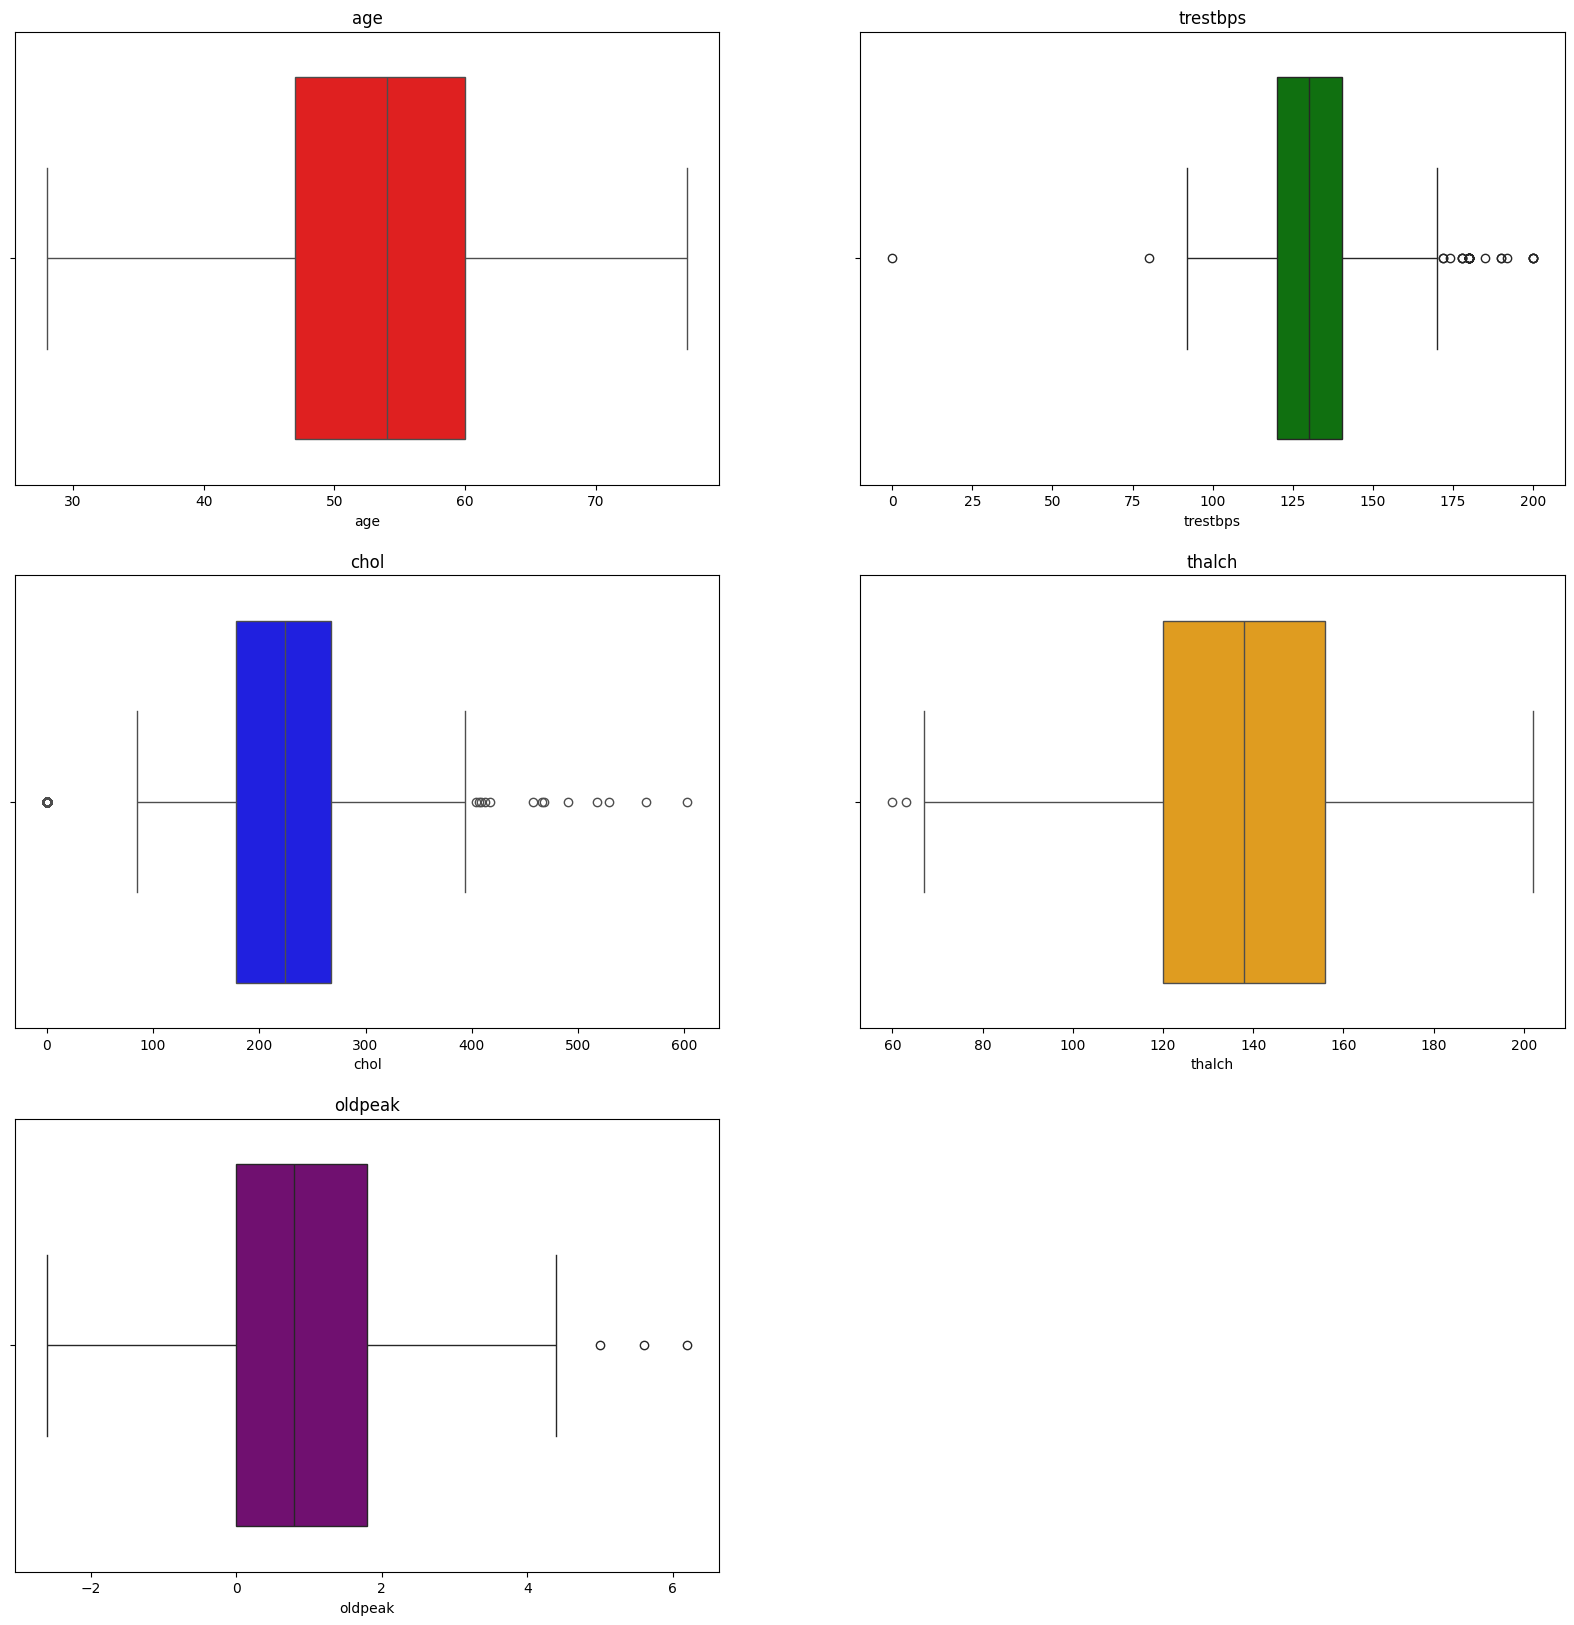

In [60]:
plt.figure(figsize=(20,20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)

plt.show()

In [61]:
import plotly.express as px

fig = px.box(df, x=cols, color_discrete_sequence=colors,)

fig.show()

In [70]:
# making the box plots of cols in plotly seperately with x and y lalels
for col in cols:
    fig = px.box(df, x=col)
    fig.show()



In [69]:
df = df[df['trestbps'] != 0]

In [64]:
df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.00,0.0,False,normal,127.00,False,0.700,upsloping,0.74,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.00,0.0,False,normal,154.00,False,0.200,upsloping,0.39,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,123.71,0.0,False,normal,130.00,True,1.535,flat,0.38,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.00,0.0,False,normal,125.00,True,1.000,flat,0.58,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.00,0.0,False,normal,166.00,False,2.800,upsloping,0.61,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.00,0.0,False,normal,120.00,False,0.500,upsloping,0.43,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.00,0.0,True,st-t abnormality,160.00,False,3.000,flat,0.51,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.00,0.0,False,st-t abnormality,110.00,True,1.000,downsloping,0.76,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,142.71,0.0,False,lv hypertrophy,124.50,True,2.062,flat,0.75,reversable defect,1


# Machine Learning

In [72]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [74]:
df['num'].info()

<class 'pandas.core.series.Series'>
Index: 919 entries, 0 to 919
Series name: num
Non-Null Count  Dtype
--------------  -----
919 non-null    int64
dtypes: int64(1)
memory usage: 14.4 KB


In [75]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [117]:
X = df.drop('num', axis = 1)
y = df['num']

le = LabelEncoder()
le_dict = {}

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])
        le_dict[col] = le
    else:
        pass

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Enlist all the models that we will be using for ML, which should all be classifiers and suitable for multi class classification 

1. Logistic regression
2. Decision tree classifier
3. KNN classifier
4. Naive Bayes Classifier
5. SVM Classifier
6. Random Forest Classifier
7. XGBoost Classifier
8. LightGBM Classifier
9. ADABoost Classifier
10. Gradient Boost Classifier




In [118]:
# !pip install lightgbm

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline

In [120]:
# how to print all rows in complete result of cell run
pd.set_option('display.max_rows', None)


In [121]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Classifier', SVC(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    # ('LightGBM', LGBMClassifier(random_state=42))
]

best_accuracy = 0
best_model = None

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    #Print the performance metrices
    print(f"Model: {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy}")
    print(f"Test Accuracy: {accuracy}")
    # print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
    # print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    #print best model and best accuracy
print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")


Model: Random Forest
Cross Validation Accuracy: 0.6965986394557823
Test Accuracy: 0.7282608695652174

Model: Decision Tree
Cross Validation Accuracy: 0.6639455782312925
Test Accuracy: 0.6956521739130435

Model: K-Nearest Neighbors
Cross Validation Accuracy: 0.5823129251700679
Test Accuracy: 0.592391304347826

Model: Support Vector Classifier
Cross Validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348

Model: AdaBoost
Cross Validation Accuracy: 0.6217687074829932
Test Accuracy: 0.5706521739130435

Model: Gradient Boosting
Cross Validation Accuracy: 0.7061224489795919
Test Accuracy: 0.7228260869565217

Model: XGBoost
Cross Validation Accuracy: 0.7034013605442178
Test Accuracy: 0.75

Model: Gaussian Naive Bayes
Cross Validation Accuracy: 0.5918367346938774
Test Accuracy: 0.5815217391304348

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None